In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the data
filename = 'data/VAC1 - V6 - p_H(p_V).csv'
p_V, p_H = np.loadtxt(
    fname=filename,
    delimiter=',',
    unpack=True,
    skiprows=1
)

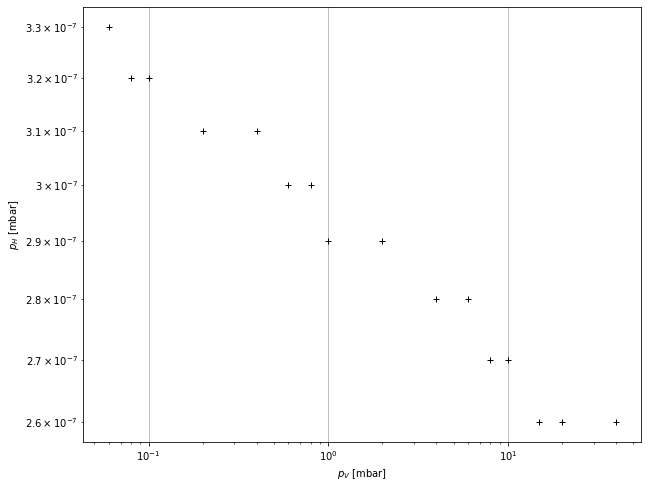

In [14]:
# Plot the data
fig, ax = plt.subplots(figsize=[10,8])
ax.grid()
ax.set_xscale('log')
ax.set_xlabel('$p_V$ [mbar]')
ax.set_yscale('log')
ax.set_ylabel('$p_H$ [mbar]')
ax.plot(p_V, p_H, 'k+')
fig.savefig('figs/aufgabe3.pdf', bbox_inches='tight')
